### Predicted Probability

Predicted probability (or "class probability") is a number from 0 to 1 (or 0% to 100%) that shows how confident a model is about its answer. If the number is 1, the model is completely sure about its answer. If it's 0.5, the model is basically guessing — it's like flipping a coin.


#### Components of a Probability Score

When a model has to choose between two classes (called binary classification), three main rules apply:

1. The predicted probability must be between 0 and 1
2. The chances of both options happening must add up to 1
3. A higher probability means the model is more sure about its choice

A higher probability means the model thinks the positive class is more likely, while a lower probability means it thinks the negative class is more likely.

In classification, a model picks the class it thinks will most likely happen — the one with the highest probability score. But two different models might pick the same class while being more or less confident about it. Their predicted probability scores tell us how sure each model is, even when they make the same choice.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Create and prepare dataset
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 
                'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy',
                'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast',
                'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0,
                   72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0,
                   88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0,
                 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0,
                 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True,
             True, False, True, True, False, False, True, False, True, True, False,
             True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
             'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
             'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}

# Prepare data
df = pd.DataFrame(dataset_dict)

df = pd.get_dummies(df, columns=['Outlook'], prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# Rearrange columns
column_order = ['sunny', 'overcast', 'rainy', 'Temperature', 'Humidity', 'Wind', 'Play']
df = df[column_order]

# Prepare features and target
X,y = df.drop('Play', axis=1), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['Temperature', 'Humidity']] = scaler.fit_transform(X_train[['Temperature', 'Humidity']])
X_test[['Temperature', 'Humidity']] = scaler.transform(X_test[['Temperature', 'Humidity']])

#### Dummy Classifier Probabilities

A **`Dummy Classifier`** is a prediction model that doesn't learn patterns from data. Instead, it follows basic rules like: picking the most common outcome, making random predictions based on how often each outcome appeared in training, always picking one answer, or randomly choosing between options with equal chance. The Dummy Classifier ignores all input features and just follows these rules.

When this model finishes training, all it remembers is a few numbers showing either how often each outcome happened or the constant values it was told to use. It doesn’t learn anything about how features relate to outcomes.

In [2]:
from sklearn.dummy import DummyClassifier
import pandas as pd
import numpy as np

# Train the model
dummy_clf = DummyClassifier(strategy='stratified', random_state=42)
dummy_clf.fit(X_train, y_train)

# Print the "model" - which is just the class probabilities
print("THE MODEL:")
print(f"Probability of not playing (class 0): {dummy_clf.class_prior_[0]:.3f}")
print(f"Probability of playing (class 1): {dummy_clf.class_prior_[1]:.3f}")
print("\nNOTE: These probabilities are used for ALL predictions, regardless of input features!")

# Make predictions and get probabilities
y_pred = dummy_clf.predict(X_test)
y_prob = dummy_clf.predict_proba(X_test)

# Create results dataframe
results_df = pd.DataFrame({
    'True Label': y_test,
    'Prediction': y_pred,
    'Probability of Play': y_prob[:, 1]
})

print("\nPrediction Results:")
print(results_df)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

THE MODEL:
Probability of not playing (class 0): 0.357
Probability of playing (class 1): 0.643

NOTE: These probabilities are used for ALL predictions, regardless of input features!

Prediction Results:
    True Label  Prediction  Probability of Play
14           0           1                  1.0
15           1           0                  0.0
16           1           0                  0.0
17           0           1                  1.0
18           0           1                  1.0
19           0           1                  1.0
20           1           1                  1.0
21           1           0                  0.0
22           1           1                  1.0
23           1           0                  0.0
24           1           1                  1.0
25           1           0                  0.0
26           0           0                  0.0
27           1           1                  1.0
Accuracy: 0.35714285714285715


#### k-Nearest Neighbors (KNN) Probabilities

**`K-Nearest Neighbors (kNN)`** is a prediction model that takes a different approach — instead of learning rules, it keeps all training examples in memory. When it needs to make a prediction about new data, it measures how similar this data is to every stored example, finds the k most similar ones (where k is a number we choose), and makes its decision based on those neighbors.

When this model finishes training, all it has stored is the complete training dataset, the value of k we chose, and a method for measuring how similar two data points are (by default using Euclidean distance).

The probability score is simply the number of neighbors belonging to a class divided by k

In [3]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

# Train the model
k = 3  # number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Print the "model"
print("THE MODEL:")
print(f"Number of neighbors (k): {k}")
print(f"Training data points stored: {len(X_train)}")

# Make predictions and get probabilities
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)

# Create results dataframe
results_df = pd.DataFrame({
   'True Label': y_test,
   'Prediction': y_pred,
   'Probability of Play': y_prob[:, 1]
})

print("\nPrediction Results:")
print(results_df)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

THE MODEL:
Number of neighbors (k): 3
Training data points stored: 14

Prediction Results:
    True Label  Prediction  Probability of Play
14           0           0             0.000000
15           1           1             0.666667
16           1           1             0.666667
17           0           1             0.666667
18           0           0             0.000000
19           0           1             0.666667
20           1           1             0.666667
21           1           1             1.000000
22           1           1             1.000000
23           1           1             1.000000
24           1           1             1.000000
25           1           1             0.666667
26           0           1             0.666667
27           1           1             0.666667
Accuracy: 0.7857142857142857


#### Naive Bayes Probabilities

**`Naive Bayes`** is a prediction model that uses probability math with a “naive” rule: it assumes each feature affects the outcome independently. There are different types of Naive Bayes: Gaussian Naive Bayes works with continuous values, while Bernoulli Naive Bayes works with binary features. As our dataset has many 0–1 features, we’ll focus on the Bernoulli one here.

When this model finishes training, it remembers probability values: one value for how often the positive class occurs, and for each feature, values showing how likely different feature values appear when we have a positive outcome.

Naive Bayes multiplies several probabilities together: the chance of each class occurring, and the chance of seeing each feature value within that class. These multiplied probabilities are then normalized so they sum to 1, giving us the final probability scores.

In [4]:
from sklearn.naive_bayes import BernoulliNB
import pandas as pd

# Train the model
nb = BernoulliNB()
nb.fit(X_train, y_train)

# Print the "model"
print("THE MODEL:")
df = pd.DataFrame(
   nb.feature_log_prob_.T, 
   columns=['Log Prob (No Play)', 'Log Prob (Play)'], 
   index=['sunny', 'overcast', 'rainy', 'Temperature', 'Humidity', 'Wind']
)
df = df.round(3)
print("\nFeature Log-Probabilities:")
print(df)

print("\nClass Priors:")
priors = pd.Series(nb.class_log_prior_, index=['No Play', 'Play']).round(3)
print(priors)

# Make predictions and get probabilities
y_pred = nb.predict(X_test)
y_prob = nb.predict_proba(X_test)

# Create results dataframe
results_df = pd.DataFrame({
   'True Label': y_test,
   'Prediction': y_pred,
   'Probability of Play': y_prob[:, 1]
})

print("\nPrediction Results:")
print(results_df)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

THE MODEL:

Feature Log-Probabilities:
             Log Prob (No Play)  Log Prob (Play)
sunny                    -0.560           -1.299
overcast                 -1.946           -0.788
rainy                    -0.847           -1.012
Temperature              -0.847           -0.788
Humidity                 -0.560           -1.299
Wind                     -0.560           -1.012

Class Priors:
No Play   -1.030
Play      -0.442
dtype: float64

Prediction Results:
    True Label  Prediction  Probability of Play
14           0           0             0.163961
15           1           1             0.890533
16           1           1             0.553502
17           0           0             0.410830
18           0           0             0.313943
19           0           0             0.323479
20           1           1             0.777110
21           1           1             0.527340
22           1           0             0.410830
23           1           1             0.966583
24   

#### Decision Tree Probabilities

A **`Decision Tree Classifier`** works by creating a series of yes/no questions about the input data. It builds these questions one at a time, always choosing the most useful question that best separates the data into groups. It keeps asking questions until it reaches a final answer at the end of a branch.

When this model finishes training, it has created a tree where each point represents a question about the data. Each branch shows which way to go based on the answer, and at the end of each branch is information about how often each class appeared in the training data.

The probability score is based on how many training examples of each class ended up at that same branch during training.

THE MODEL (DECISION TREE STRUCTURE):


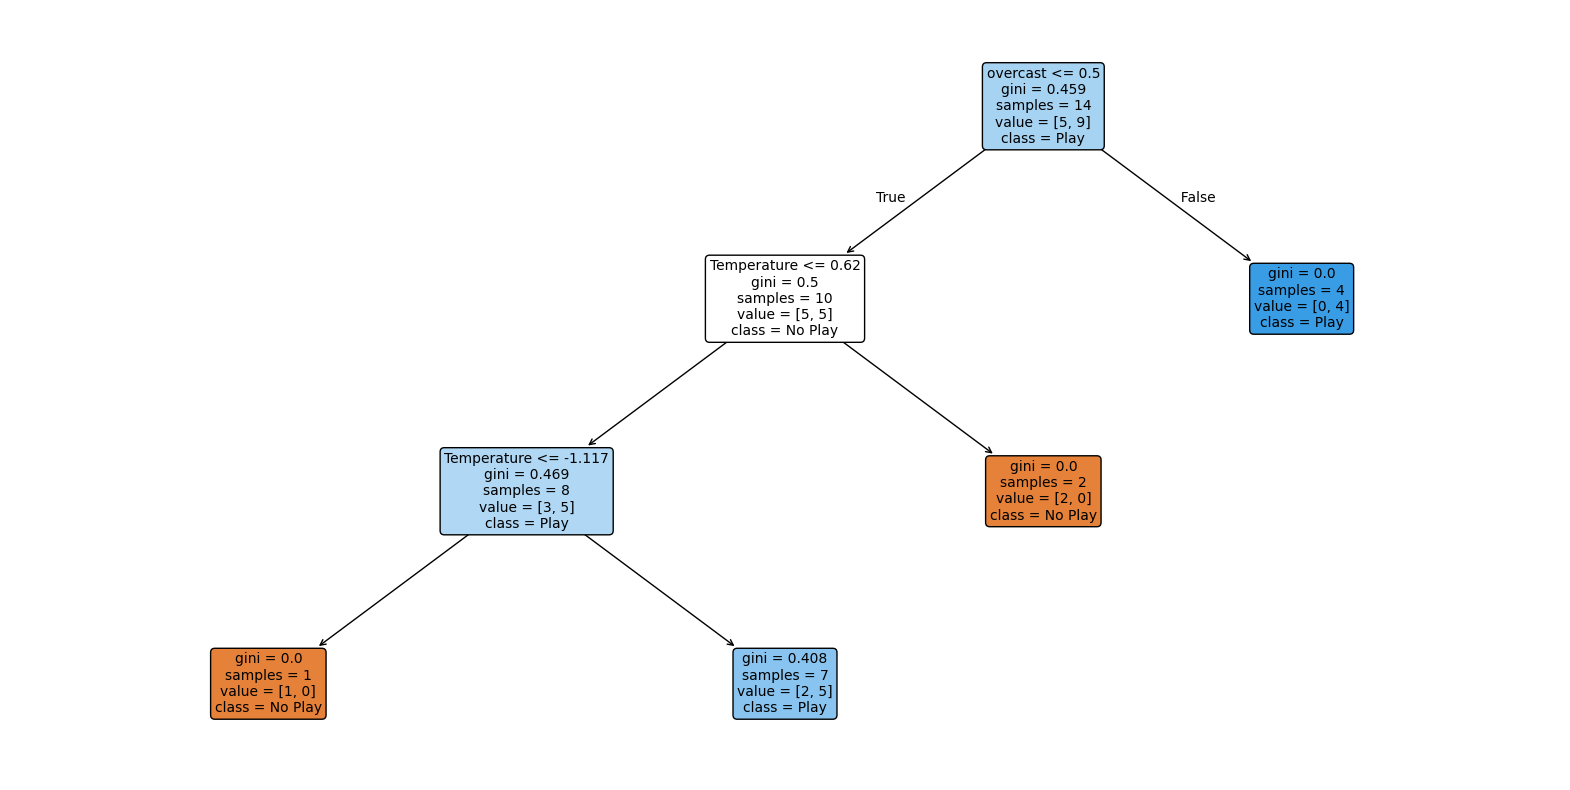


Prediction Results:
    True Label  Prediction  Probability of Play
14           0           0             0.000000
15           1           1             1.000000
16           1           1             0.714286
17           0           0             0.000000
18           0           0             0.000000
19           0           1             0.714286
20           1           1             1.000000
21           1           1             0.714286
22           1           0             0.000000
23           1           1             1.000000
24           1           0             0.000000
25           1           1             1.000000
26           0           0             0.000000
27           1           1             1.000000
Accuracy: 0.7857142857142857


In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

# Train the model
dt = DecisionTreeClassifier(random_state=42, max_depth=3)  # limiting depth for visibility
dt.fit(X_train, y_train)

# Print the "model" - visualize the decision tree
print("THE MODEL (DECISION TREE STRUCTURE):")
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=['sunny', 'overcast', 'rainy', 'Temperature', 
                           'Humidity', 'Wind'], 
         class_names=['No Play', 'Play'],
         filled=True, rounded=True, fontsize=10)
plt.show()

# Make predictions and get probabilities
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

# Create results dataframe
results_df = pd.DataFrame({
   'True Label': y_test,
   'Prediction': y_pred,
   'Probability of Play': y_prob[:, 1]
})

print("\nPrediction Results:")
print(results_df)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

#### Logistic Regression Probabilities

A **`Logistic Regression`** model, despite its name, predicts between two classes using a mathematical equation. For each feature in the input data, it learns how important that feature is by giving it a number (weight). It also learns one extra number (bias) that helps make better predictions. To turn these numbers into a predicted probability, it uses the sigmoid function that keeps the final answer between 0 and 1.

When this model finishes training, all it remembers is these weights — one number for each feature, plus the bias number. These numbers are all it needs to make predictions.

For calculating predicted probability in binary classification, logistic regression first multiplies each feature value by its weight and adds them all together, plus the bias. This sum could be any number, so the model uses the sigmoid function to convert it into a probability between 0 and 1.

In [6]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Train the model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Print the "model"
print("THE MODEL:")
model_df = pd.DataFrame({
   'Feature': ['sunny', 'overcast', 'rainy', 'Temperature', 'Humidity', 'Wind'],
   'Coefficient': lr.coef_[0]
})
model_df['Coefficient'] = model_df['Coefficient'].round(3)
print("Coefficients (weights):")
print(model_df)

print(f"\nIntercept (bias): {lr.intercept_[0]:.3f}")
print("\nPrediction = sigmoid(intercept + sum(coefficient * feature_value))")

# Make predictions and get probabilities
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)

# Create results dataframe
results_df = pd.DataFrame({
   'True Label': y_test,
   'Prediction': y_pred,
   'Probability of Play': y_prob[:, 1]
})

print("\nPrediction Results:")
print(results_df)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

THE MODEL:
Coefficients (weights):
       Feature  Coefficient
0        sunny       -0.541
1     overcast        0.756
2        rainy       -0.216
3  Temperature       -0.197
4     Humidity       -0.442
5         Wind       -0.674

Intercept (bias): 1.016

Prediction = sigmoid(intercept + sum(coefficient * feature_value))

Prediction Results:
    True Label  Prediction  Probability of Play
14           0           0             0.311983
15           1           1             0.770652
16           1           1             0.623501
17           0           0             0.477097
18           0           0             0.417287
19           0           0             0.469408
20           1           1             0.627348
21           1           1             0.612576
22           1           1             0.515645
23           1           1             0.895062
24           1           1             0.777389
25           1           1             0.552495
26           0           1     

#### Support Vector Machine (SVM) Probabilities

A **`Support Vector Machine (SVM) Classifier`** works by finding the best boundary line (or surface) that separates different classes. It focuses on the points closest to this boundary (called support vectors). While the basic SVM finds straight boundary lines, it can also create curved boundaries using mathematical functions called kernels.

When this model finishes training, it remembers three things: the important points near the boundary (support vectors), how much each point matters (weights), and any settings for curved boundaries (kernel parameters). Together, these define where and how the boundary separates the classes.

For calculating predicted probability in binary classification, SVM needs an extra step because it wasn’t designed to give probability scores. It uses a method called Platt Scaling, which adds a Logistic Regression layer to convert distances from the boundary into probabilities. These distances go through the sigmoid function to get final probability scores.

Since SVM calculates probabilities this indirect way, the scores show how far points are from the boundary rather than true confidence levels. Points far from the boundary get probability scores closer to 0 or 1, while points near the boundary get scores closer to 0.5. This means the probability scores are more about location relative to the boundary than the model’s actual confidence in its predictions.

In [7]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np

# Train the model
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Print the "model"
print("THE MODEL:")
print(f"Kernel: {svm.kernel}")
print(f"Number of support vectors: {svm.n_support_}")
print("\nSupport Vectors (showing first 5 rows):")

# Create dataframe of support vectors
sv_df = pd.DataFrame(
   svm.support_vectors_,
   columns=['sunny', 'overcast', 'rainy', 'Temperature', 'Humidity', 'Wind']
)
print(sv_df.head().round(3))

# Show which classes these support vectors belong to
print("\nSupport vector classes:")
for i, count in enumerate(svm.n_support_):
   print(f"Class {i}: {count} support vectors")

# Make predictions and get probabilities
y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)

# Create results dataframe
results_df = pd.DataFrame({
   'True Label': y_test,
   'Prediction': y_pred,
   'Probability of Play': y_prob[:, 1]
})

print("\nPrediction Results:")
print(results_df)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

THE MODEL:
Kernel: rbf
Number of support vectors: [5 8]

Support Vectors (showing first 5 rows):
   sunny  overcast  rainy  Temperature  Humidity  Wind
0    1.0       0.0    0.0        1.805     0.497   0.0
1    1.0       0.0    0.0        1.015     1.024   1.0
2    0.0       0.0    1.0       -1.354    -1.085   1.0
3    1.0       0.0    0.0       -0.248     1.552   0.0
4    0.0       0.0    1.0       -0.406    -0.030   1.0

Support vector classes:
Class 0: 5 support vectors
Class 1: 8 support vectors

Prediction Results:
    True Label  Prediction  Probability of Play
14           0           0             0.155914
15           1           1             0.716996
16           1           1             0.709965
17           0           1             0.615716
18           0           0             0.142538
19           0           1             0.662530
20           1           1             0.567168
21           1           1             0.752700
22           1           1             0.

#### Multilayer Perceptron Probabilities

A Multi-Layer Perceptron (MLP) Classifier is a type of neural network that processes data through several layers of connected nodes (neurons). Each neuron calculates a weighted total of its inputs, transforms this number using a function (like ReLU), and sends the result to the next layer. For binary classification, the last layer uses the sigmoid function to give an output between 0 and 1.

When this model finishes training, it remembers two main things: the connection strengths (weights and biases) between neurons in neighboring layers, and how the network is structured (how many layers and neurons are in each layer).

For calculating predicted probability in binary classification, the MLP moves data through its layers, with each layer creating more complex combinations of information from the previous layer. The final layer produces a number that the sigmoid function converts into a probability between 0 and 1.

In [8]:
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np

# Train the model with a simple architecture
mlp = MLPClassifier(hidden_layer_sizes=(4,2), random_state=42)
mlp.fit(X_train, y_train)

# Print the "model"
print("THE MODEL:")
print("Network Architecture:")
print(f"Input Layer: {mlp.n_features_in_} neurons (features)")
for i, layer_size in enumerate(mlp.hidden_layer_sizes):
   print(f"Hidden Layer {i+1}: {layer_size} neurons")
print(f"Output Layer: {mlp.n_outputs_} neurons (classes)")

# Show weights for first hidden layer
print("\nWeights from Input to First Hidden Layer:")
weights_df = pd.DataFrame(
   mlp.coefs_[0],
   columns=[f'Hidden_{i+1}' for i in range(mlp.hidden_layer_sizes[0])],
   index=['sunny', 'overcast', 'rainy', 'Temperature', 'Humidity', 'Wind']
)
print(weights_df.round(3))

print("\nNote: Additional weights and biases exist between subsequent layers")

# Make predictions and get probabilities
y_pred = mlp.predict(X_test)
y_prob = mlp.predict_proba(X_test)

# Create results dataframe
results_df = pd.DataFrame({
   'True Label': y_test,
   'Prediction': y_pred,
   'Probability of Play': y_prob[:, 1]
})

print("\nPrediction Results:")
print(results_df)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

THE MODEL:
Network Architecture:
Input Layer: 6 neurons (features)
Hidden Layer 1: 4 neurons
Hidden Layer 2: 2 neurons
Output Layer: 1 neurons (classes)

Weights from Input to First Hidden Layer:
             Hidden_1  Hidden_2  Hidden_3  Hidden_4
sunny           0.012     0.824     0.255     0.344
overcast       -0.242    -0.333    -0.499     0.840
rainy           0.128     0.477    -0.556     0.870
Temperature     0.766    -0.665    -0.388    -0.401
Humidity       -0.594    -0.108    -0.001    -0.398
Wind            0.062    -0.639    -0.154    -0.057

Note: Additional weights and biases exist between subsequent layers

Prediction Results:
    True Label  Prediction  Probability of Play
14           0           0             0.308182
15           1           0             0.368810
16           1           0             0.484164
17           0           0             0.464887
18           0           0             0.319483
19           0           1             0.538204
20           1

D:\WORKSPACE\GitHub\shortthirdman\PredictorXVault-Cookbook\dev\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
